# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Responderemos a la siguiente pregunta

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?


## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020, los tres primeros meses (Enero, Febrero, Marzo) y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [1]:
# Path del dataset a utilizar.
DATASET_PATH = r'./data'

In [2]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-01.parquet yellow_tripdata_2020-03.parquet
yellow_tripdata_2020-02.parquet


In [3]:
# Importamos las librerias necesarias para interactuar con el dataset.

import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; sns.set()
import sklearn as sk
from sklearn.model_selection import train_test_split

# Set decimals format with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
all_files = glob.glob("./data/*.parquet")

dataframe_list = []

for filename in all_files:
    # Se carga el archivo
    df = pd.read_parquet(filename)
    # Tomo el 10% del dataset total   
    df = df.sample(frac=0.1)
    # Agrego a la lista
    dataframe_list.append(df)


dataframe = pd.concat(dataframe_list, axis=0, ignore_index=True)


dataframe.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555924.000,1571207.000,1555924.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555924.000
mean,1.673,1.501,3.046,1.056,164.420,162.224,1.252,12.617,1.107,0.492,2.192,0.331,0.298,18.561,2.297
std,0.470,1.142,176.422,0.737,65.720,70.011,0.486,11.774,1.257,0.073,2.711,1.777,0.035,14.383,0.706
min,1.000,0.000,-29.470,1.000,1.000,1.000,0.000,-300.000,-7.000,-0.500,-45.000,-25.990,-0.300,-303.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,210148.620,99.000,265.000,265.000,4.000,960.500,90.060,0.500,445.680,831.750,0.300,960.800,2.750


In [5]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571207 entries, 0 to 1571206
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1571207 non-null  int64         
 1   tpep_pickup_datetime   1571207 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1571207 non-null  datetime64[ns]
 3   passenger_count        1555924 non-null  float64       
 4   trip_distance          1571207 non-null  float64       
 5   RatecodeID             1555924 non-null  float64       
 6   store_and_fwd_flag     1555924 non-null  object        
 7   PULocationID           1571207 non-null  int64         
 8   DOLocationID           1571207 non-null  int64         
 9   payment_type           1571207 non-null  int64         
 10  fare_amount            1571207 non-null  float64       
 11  extra                  1571207 non-null  float64       
 12  mta_tax                15712

In [6]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
dataframe.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555924.000,1571207.000,1555924.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555924.000
mean,1.673,1.501,3.046,1.056,164.420,162.224,1.252,12.617,1.107,0.492,2.192,0.331,0.298,18.561,2.297
std,0.470,1.142,176.422,0.737,65.720,70.011,0.486,11.774,1.257,0.073,2.711,1.777,0.035,14.383,0.706
min,1.000,0.000,-29.470,1.000,1.000,1.000,0.000,-300.000,-7.000,-0.500,-45.000,-25.990,-0.300,-303.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,210148.620,99.000,265.000,265.000,4.000,960.500,90.060,0.500,445.680,831.750,0.300,960.800,2.750


### Descripción de Columnas del Dataset.


In [7]:
# Listado de tipos de variables presentes en el dataset
dataframe.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [8]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=10, ylabelsize=10,figsize=(18,18))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout
    plt.show()
    

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}/{col.size}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

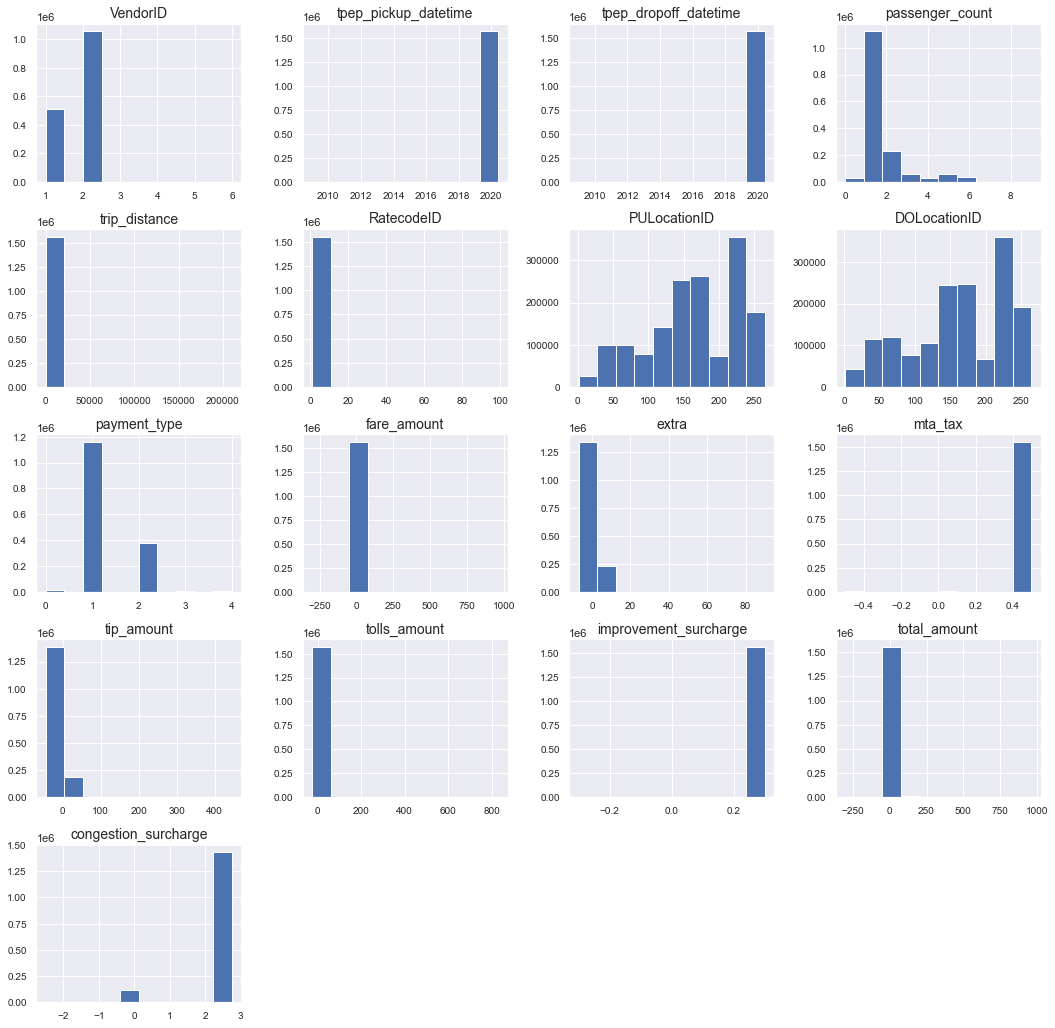

In [9]:
#imprimo distribuciones 
display_dataset_distributions(dataframe)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [10]:
print_categorical(dataframe.VendorID)

Ordinalidad: [2 1 6 5]
Cantidad de nulos: 0/1571207
Ocurrencias:
5          4
6         47
1     514175
2    1056981
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [11]:
print_null_info(dataframe.tpep_pickup_datetime)

Cantidad de nulos: 0/1571207


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [12]:
print_null_info(dataframe.tpep_dropoff_datetime)

Cantidad de nulos: 0/1571207


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [13]:
print_null_info(dataframe.passenger_count)

Cantidad de nulos: 15283/1571207



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [14]:
print_null_info(dataframe.trip_distance)

Cantidad de nulos: 0/1571207


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [15]:
print_categorical(dataframe.PULocationID)

Ordinalidad: [ 87 239  68 162 186 234 144 246 236 261 230 211 143 249 138 164 151 132
 161  42  90  43 107  74 237 263 226  48 158 229 262  75 233 137 140 163
 238 231 114 170 264 146 142 141 166 148  88   4 185  24 228 100 244 152
  79  70 125  50  13  52  65 116 113 247 232   7  41 129 260 193 189  56
  45 224  25  80 196  95 130 181 167 265  66  97 202 209  33 197  76  93
 255 250  40  71 223 179  92  12 102  89  69  82  49  61  51 127 210  54
  78  98 257 168  28  72  37 205 157 194 145 134 177 106  83  14  36 256
 243 217 254 188 227  62 121 131 215   9 173 128  77 235  10 119 225  47
 216 219  26  17 222  35 190   1 153 208 117  18 122 159 126  91 169 182
  19  11 218 155 175  81 124  39 203  16 212 248 242  38 207 115 258 123
 112  32 241  60  29 136 259 201 213 252 133 198  85 147 165 191 171  53
 192   3 220  20  86 108 240 149  55 135  73   6  31  21  27  58 150  63
  22 253 160 109 139 200  94 195 214 178 174 101 183 118  44   5  59  46
 180  15  64  34  23   8 206  67  99 1


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [16]:
print_categorical(dataframe.DOLocationID)

Ordinalidad: [246 238 140   4  90 231 249 234 161 230 239  13 226  88 236 100 113  42
 164 263 107  48 233 163  50 186 170 237  75 138 218 262 162  79 144 158
 125  68 264  45 232 132 229 181 211 119 142 255  49   3  43  35 224 141
  72  95 143  70 129 137  41 116 179  87  52 223 130 151 174  89 114  82
 216 166  32  39 160 261 256 247  25 112  24 148  60 152  17 209  97  76
   7 167  62 260 203  74   1 197  65  28  18 193  56 190 121 135  69 117
  33 254 196 134  93  10  14  61 244 265 228 217  80 252 225 168 243 180
 159  66  40 215  37  91 145 127 102 191 146 207 200  36  55 123 222  98
  19 133 131 106  26 202  63 241 195 208 198 149 136 189 171 124  47 227
 213   9 258  54  92  71  83 177 147 235 205  84 188  53 173 122  77 157
 259 155 139  22  85  78  15 165  51 257 185 182 206 183  11   8 178 120
 219  21 220 250 210  31  86 248  12  81  38 126 201 240  34  16 169 153
  20 192  29 214 212  64 245  94  67 242 176 194 175 108 253  73 101 115
 118 150 128   5 184 221  23  96 109  


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [17]:
print_categorical(dataframe.RatecodeID)

Ordinalidad: [ 1.  2. nan  5.  3.  4. 99.  6.]
Cantidad de nulos: 15283/1571207
Ocurrencias:
6.000          10
99.000         68
4.000        1196
3.000        3130
5.000        8662
2.000       35906
1.000     1506952
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [18]:
print_categorical(dataframe.store_and_fwd_flag)

Ordinalidad: ['N' None 'Y']
Cantidad de nulos: 15283/1571207
Ocurrencias:
Y      15818
N    1540106
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [19]:
print_categorical(dataframe.payment_type)

Ordinalidad: [1 2 0 3 4]
Cantidad de nulos: 0/1571207
Ocurrencias:
4       4548
3       8129
0      15283
2     381608
1    1161639
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [20]:
print_null_info(dataframe.fare_amount)

Cantidad de nulos: 0/1571207


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [21]:
print_null_info(dataframe.extra)

Cantidad de nulos: 0/1571207



- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [22]:
print_null_info(dataframe.mta_tax)

Cantidad de nulos: 0/1571207


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [23]:
print_null_info(dataframe.improvement_surcharge)

Cantidad de nulos: 0/1571207


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [24]:
print_null_info(dataframe.tip_amount)

Cantidad de nulos: 0/1571207


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [25]:
print_null_info(dataframe.tolls_amount)

Cantidad de nulos: 0/1571207



- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [26]:
print_null_info(dataframe.total_amount)

Cantidad de nulos: 0/1571207


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [27]:
print_null_info(dataframe.congestion_surcharge)

Cantidad de nulos: 15283/1571207


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [28]:
print_null_info(dataframe.airport_fee)

Cantidad de nulos: 1571207/1571207


## 2. Limpieza de los datos


### 2.1 Datos faltantes

In [29]:
# verificamos cantidad de items repetidos y los eliminamos
#dataframe.duplicated().sum(), dataframe.size
dataframe = dataframe.drop_duplicates()
dataframe.size

29850577

In [30]:
# verificamos cantidad de nulos en cada categoría
for i in range(len(dataframe.columns)):
  col_name = dataframe.columns[i]
  col_data = dataframe[col_name]
  print(f'{col_name}: {col_data.isnull().sum()}/{col_data.size}')

VendorID: 0/1571083
tpep_pickup_datetime: 0/1571083
tpep_dropoff_datetime: 0/1571083
passenger_count: 15159/1571083
trip_distance: 0/1571083
RatecodeID: 15159/1571083
store_and_fwd_flag: 15159/1571083
PULocationID: 0/1571083
DOLocationID: 0/1571083
payment_type: 0/1571083
fare_amount: 0/1571083
extra: 0/1571083
mta_tax: 0/1571083
tip_amount: 0/1571083
tolls_amount: 0/1571083
improvement_surcharge: 0/1571083
total_amount: 0/1571083
congestion_surcharge: 15159/1571083
airport_fee: 1571083/1571083


In [31]:
# quitamos las columnas VendorID, RateCodeID, store_and_fwd_flag y airport_fee ya que son nulas o no aportan valor
cols_to_drop = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'airport_fee']
print(f'Total original cols:{len(dataframe.columns)}')
dataframe = dataframe.drop(cols_to_drop, axis=1)
print(f'Total cols after removing unused data:{len(dataframe.columns)}')

Total original cols:19
Total cols after removing unused data:15


#### 2.1.1 Análisis de faltantes
La única categoría con faltantes no filtrada es passenger_count. Se entiende que este dato es ingresado manualmente. 
Se propone eliminar dichas muestras ya que representan el 1% aproximadamente del dataset total


In [32]:
# descarto filas con passenger count o congestion_surcharge nulo
dataframe = dataframe.dropna(subset=['passenger_count', 'congestion_surcharge'])
len(dataframe['passenger_count'])

1555924

### 2.2 Ingeniería de datos

In [33]:
# generamos una nueva columna "duration" con el tiempo de viaje
ts_init = pd.to_datetime(dataframe['tpep_pickup_datetime']).values.astype(np.int64) / 1000000000
ts_end = pd.to_datetime(dataframe['tpep_dropoff_datetime']).values.astype(np.int64) / 1000000000
duration = ts_end - ts_init
dataframe['trip_duration'] = duration

# ademas creamos 3 categorías para el horario en que se inició el viaje: diurno, vespertino y nocturno
MORNING_START = 6
MORNING_END = 13
AFTERNOON_START = 14
AFTERNOON_END = 20
EVENING_START = 21
EVENING_END = 5 
day_interval = dataframe['tpep_pickup_datetime'].dt.hour
dataframe['morning'] = pd.cut(day_interval, bins=[-float('Inf'), MORNING_START - 1, MORNING_END, float('Inf')], labels=[0, 1, 0], ordered=False)
dataframe['afternoon'] = pd.cut(day_interval, bins=[-float('Inf'), AFTERNOON_START - 1, AFTERNOON_END, float('Inf')], labels=[0, 1, 0], ordered=False)
dataframe['evening'] = pd.cut(day_interval, bins=[-float('Inf'), 0, EVENING_END, EVENING_START, 23, float('Inf')], labels=[0, 1, 0, 1, 0], ordered=False)

# reviso que sean validas 
dataframe['morning'].values.isnull().sum(), dataframe['afternoon'].values.isnull().sum(), dataframe['evening'].values.isnull().sum()

dataframe.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
count,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000
mean,1.501,2.820,164.694,162.533,1.264,12.445,1.097,0.494,2.213,0.318,0.298,18.403,2.297,952.729
std,1.142,3.694,65.571,69.895,0.472,11.623,1.251,0.068,2.714,1.758,0.035,14.281,0.706,3749.694
min,0.000,-1.790,1.000,1.000,1.000,-300.000,-7.000,-0.500,-45.000,-25.990,-0.300,-303.300,-2.500,0.000
25%,1.000,0.960,132.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500,383.000
50%,1.000,1.600,162.000,162.000,1.000,9.000,0.500,0.500,1.960,0.000,0.300,14.300,2.500,631.000
75%,2.000,2.900,234.000,234.000,2.000,13.500,2.500,0.500,2.900,0.000,0.300,19.750,2.500,1012.000
max,9.000,369.940,265.000,265.000,4.000,960.500,90.060,0.500,445.680,831.750,0.300,960.800,2.750,332995.000


<AxesSubplot:>

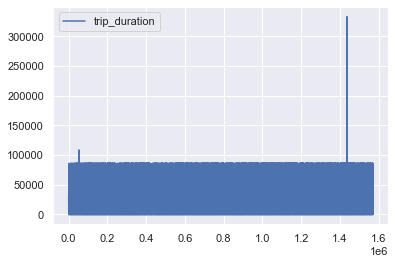

In [34]:
# Trip Duration

dataframe.plot(kind='line', y='trip_duration')

Text(0.5, 1.0, 'Cantidad de datos en la noche')

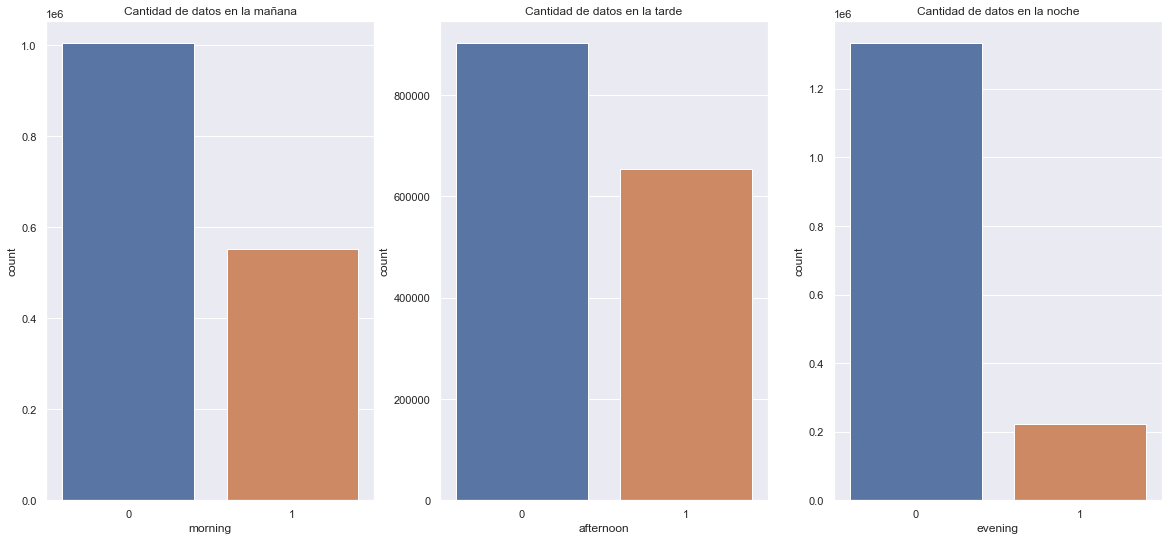

In [36]:
#  Visualización de los datos generados para MORNING - AFTERNOON - EVENING  
j = 1
fig = plt.figure(figsize=(20,30))
plt.subplot(3,3,j)
sns.countplot(x='morning', data=dataframe)
plt.title(f"Cantidad de datos en la mañana")
plt.subplot(3,3,j+1)
sns.countplot(x='afternoon', data=dataframe)
plt.title(f"Cantidad de datos en la tarde")
plt.subplot(3,3,j+2)
sns.countplot(x='evening', data=dataframe)
plt.title(f"Cantidad de datos en la noche")

In [41]:
# definimos el umbral mínimo de cantidad de viajes para podar las categorías PULocationID y DOLocationID.
location_id_min_th_count = 0.01
total_items = len(dataframe['PULocationID'])

# convertimos PULocationID usando frequency encoding y me quedo con los que representan al menos 1%
pulocation_id_freq_map = (dataframe['PULocationID'].value_counts(sort=True) / total_items).to_dict()
dataframe['PULocationIDFreq'] = dataframe['PULocationID'].apply(lambda x: pulocation_id_freq_map[x])
# convertimos DOLocationID
dolocation_id_freq_map = (dataframe['DOLocationID'].value_counts(sort=True) / total_items).to_dict()
dataframe['DOLocationIDFreq'] = dataframe['DOLocationID'].apply(lambda x: dolocation_id_freq_map[x])

#pongo en 0 todas las categorías con menor frecuencia que <location_id_min_th_count>
def clear_location_low_values(x):
  if x <= location_id_min_th_count:
    return 0
  return x

dataframe['PULocationIDFreq'].apply(lambda x: clear_location_low_values(x))
dataframe['DOLocationIDFreq'].apply(lambda x: clear_location_low_values(x))


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,morning,afternoon,evening,PULocationIDFreq,DOLocationIDFreq
0,2020-03-03 13:49:45,2020-03-03 14:05:38,1.000,2.780,87,246,1,13.000,0.000,0.500,...,0.000,0.300,20.380,2.500,953.000,1,0,0,0.007,0.020
1,2020-03-06 14:04:10,2020-03-06 14:10:50,1.000,0.810,239,238,2,6.000,0.000,0.500,...,0.000,0.300,9.300,2.500,400.000,0,1,0,0.027,0.023
2,2020-03-07 02:33:25,2020-03-07 02:51:47,2.000,4.470,68,140,2,17.500,0.500,0.500,...,0.000,0.300,21.300,2.500,1102.000,0,0,1,0.023,0.020
3,2020-03-23 21:08:20,2020-03-23 21:18:08,1.000,3.300,162,4,2,11.500,3.000,0.500,...,0.000,0.300,15.300,2.500,588.000,0,0,0,0.037,0.004
4,2020-03-01 16:45:41,2020-03-01 16:50:10,2.000,0.680,186,90,1,5.000,0.000,0.500,...,0.000,0.300,8.300,2.500,269.000,0,1,0,0.036,0.015


<AxesSubplot:>

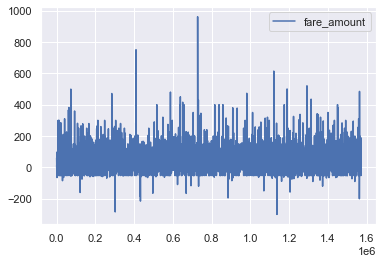

In [42]:
# Deteccion de negativos en fare-amount
dataframe.plot(kind='line', y='fare_amount')

In [45]:
for i, value in enumerate(dataframe['fare_amount']):
    if (value < 0):
        dataframe = dataframe.drop(dataframe.index[i])
        
dataframe.plot(kind='line', y='fare_amount')

KeyboardInterrupt: 

In [39]:
dataframe.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,PULocationIDFreq,DOLocationIDFreq
count,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000,1555924.000
mean,1.501,2.820,164.694,162.533,1.264,12.445,1.097,0.494,2.213,0.318,0.298,18.403,2.297,952.729,0.024,0.020
std,1.142,3.694,65.571,69.895,0.472,11.623,1.251,0.068,2.714,1.758,0.035,14.281,0.706,3749.694,0.012,0.012
min,0.000,-1.790,1.000,1.000,1.000,-300.000,-7.000,-0.500,-45.000,-25.990,-0.300,-303.300,-2.500,0.000,0.000,0.000
25%,1.000,0.960,132.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500,383.000,0.017,0.011
50%,1.000,1.600,162.000,162.000,1.000,9.000,0.500,0.500,1.960,0.000,0.300,14.300,2.500,631.000,0.023,0.020
75%,2.000,2.900,234.000,234.000,2.000,13.500,2.500,0.500,2.900,0.000,0.300,19.750,2.500,1012.000,0.032,0.027
max,9.000,369.940,265.000,265.000,4.000,960.500,90.060,0.500,445.680,831.750,0.300,960.800,2.750,332995.000,0.045,0.044


## 3.Entrenamiento de modelos 
### 3.1 Separación de datos


In [40]:
# Particionamos en train y test
train_ratio = 0.7
test_ratio = 0.3

feature_cols = ['passenger_count'] # TODO ADD HERE COLS
target_col = ['DOLocationID'] # TODO DOUBLE CHECK COL

X = dataframe[feature_cols].values
y = dataframe[target_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
